In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
from tqdm.auto import tqdm  
import spacy # pip install spacy==2.2.4
import warnings

warnings.filterwarnings("ignore")

from src.data.process_pdfs import convert_pdf_to_txt

In [3]:
pd.set_option("display.max_rows", 5)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

## 1. Load cleaned text already masked by spaCy

In [12]:
df = pd.read_pickle('data/processed/OLD_reports_tokenized.p')
df

,ID,Identifier,Company_Name,ISIN,Ticker,Country_of_Exchange,Financial_Period_Absolute,Financial_Period_Relative,CSR_URL,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,CSR_Filename,CSR_Text_clean,CSR_Text_tokenized
0,0,888.L,888 Holdings PLC,GI000A0F6407,888,United Kingdom,2020,FY0,https://corporate.888.com/wp-content/uploads/2021/04/2020-Annual-Report.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,False,True,False,0_888.L_2020.pdf,888 ORG ANNUAL REPORT & ACCOUNTS 2020 A YEAR OF STRONG GROWTH 888 IS ONE OF THE WORLDS LEADING O...,org annual report account year strong growth one world leading online betting gaming company org...
1,1,A.N,Agilent Technologies Inc,US00846U1016,A,United States of America,2020,FY0,https://www.agilent.com/about/companyinfo/sustainability/Agilent-Report-CSR-2020.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,True,True,False,1_A.N_2020.pdf,Delivering on our Promises 2020 Corporate ORG 1 Letter from the President Stakeholder engagement...,delivering promise corporate org letter president stakeholder engagement environment table conte...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8139,12676,ZBH.N,Zimmer Biomet Holdings Inc,US98956P1021,ZBH,United States of America,2016,FY-4,https://www.responsibilityreports.com/HostedData/ResponsibilityReportArchive/z/NYSE_ZBH_2016.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,False,NaN,False,True,False,12676_ZBH.N_2016.pdf,E N V I R O N M E N T A L S O C I A L G O V E R N A N C E Sustainability Report 2016 T A B L E O...,e n v r n e n l c l g v e r n n c e sustainability report b l e f c n e n company profile corpor...
8140,12677,ZBH.N,Zimmer Biomet Holdings Inc,US98956P1021,ZBH,United States of America,2015,FY-5,https://www.responsibilityreports.com/HostedData/ResponsibilityReportArchive/z/NYSE_ZBH_2015.pdf,False,False,True,True,False,True,True,False,False,NaN,False,True,False,NaN,False,False,False,12677_ZBH.N_2015.pdf,E N V I R O N M E N T A L S O C I A L G O V E R N A N C E Sustainability Report 2015 Investing n...,e n v r n e n l c l g v e r n n c e sustainability report investing future world b l e f c n e n...


## 2. Mask company names with own function

In [13]:
# Step 2: Custom (mask each word in company name)

for index, row in df.iterrows():
    words = row['Company_Name'].split()
    for word in words:
        df.loc[index, 'CSR_Text_clean'] = df.loc[index, 'CSR_Text_clean'].replace(word,'ORG2').replace(word.lower(),'ORG2').replace(word.upper(),'ORG2')

## 3. Analyze masking

In [14]:
import re

def count_words_ORG(text):
    count = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape('ORG'), text))
    return count

def count_words_ORG2(text):
    count = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape('ORG2'), text))
    return count

In [15]:
tqdm.pandas() # Display progressbar
df['ORG_count'] = df['CSR_Text_clean'].progress_apply(count_words_ORG)

tqdm.pandas() # Display progressbar
df['ORG2_count'] = df['CSR_Text_clean'].progress_apply(count_words_ORG2)

  0%|          | 0/8141 [00:00<?, ?it/s]

  0%|          | 0/8141 [00:00<?, ?it/s]

(array([3.765e+03, 2.074e+03, 8.900e+02, 3.990e+02, 3.060e+02, 2.440e+02,
        1.840e+02, 1.040e+02, 5.900e+01, 4.500e+01, 2.200e+01, 1.500e+01,
        1.200e+01, 5.000e+00, 4.000e+00, 2.000e+00, 0.000e+00, 7.000e+00,
        1.000e+00, 3.000e+00]),
 array([   0. ,  403.1,  806.2, 1209.3, 1612.4, 2015.5, 2418.6, 2821.7,
        3224.8, 3627.9, 4031. , 4434.1, 4837.2, 5240.3, 5643.4, 6046.5,
        6449.6, 6852.7, 7255.8, 7658.9, 8062. ]),
 <BarContainer object of 20 artists>)

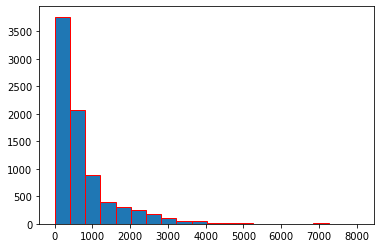

In [21]:
plt.hist(df['ORG_count'], bins=20, edgecolor="red")

(array([7.404e+03, 5.380e+02, 1.170e+02, 2.900e+01, 1.000e+01, 1.000e+01,
        4.000e+00, 3.000e+00, 6.000e+00, 4.000e+00, 3.000e+00, 3.000e+00,
        3.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00]),
 array([   0. ,  345.8,  691.6, 1037.4, 1383.2, 1729. , 2074.8, 2420.6,
        2766.4, 3112.2, 3458. , 3803.8, 4149.6, 4495.4, 4841.2, 5187. ,
        5532.8, 5878.6, 6224.4, 6570.2, 6916. ]),
 <BarContainer object of 20 artists>)

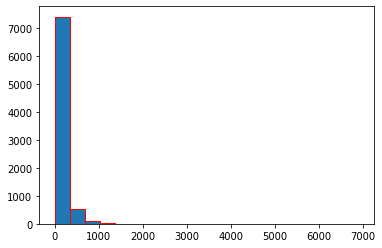

In [22]:
plt.hist(df['ORG2_count'], bins=20, edgecolor="red")

In [29]:
pd.set_option("display.max_rows", None)
df[df['ORG2_count'] > 1000]

,ID,Identifier,Company_Name,ISIN,Ticker,Country_of_Exchange,Financial_Period_Absolute,Financial_Period_Relative,CSR_URL,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,CSR_Filename,CSR_Text_clean,CSR_Text_tokenized,ORG_count,ORG2_count
75,100,ANZ.AX,Australia and New Zealand Banking Group Ltd,AU000000ANZ3,ANZ,Australia,2020,FY0,https://www.anz.com.au/content/dam/anzcom/shareholder/ANZ-2020-ESG-Supplement.pdf,True,False,True,True,True,True,True,True,True,NaN,True,True,True,NaN,True,True,True,100_ANZ.AX_2020.pdf,2 0 2 0 E S G S U P P L E M E N T Overview Fair ORG2 responsible ORG2 Environmental sustainabili...,e g u p p l e e n overview fair responsible banking environmental sustainability housing financi...,1357,2970
128,169,AWK.N,American Water Works Company Inc,US0304201033,AWK,United States of America,2020,FY0,https://s26.q4cdn.com/750150140/files/doc_downloads/esg_docs/2021/2019-2020-Sustainability-Repor...,True,False,True,True,True,True,True,True,False,NaN,True,True,True,NaN,False,True,True,169_AWK.N_2020.pdf,VITAL EFFICIENT SUSTAINABLE 20192020 SUSTAINABILITY REPORT Contents About This Report.3 Greeting...,vital efficient sustainable sustainability report content report greeting president ceo american...,1020,1092
151,203,BDX.N,Becton Dickinson and Co,US0758871091,BDX,United States of America,2020,FY0,https://www.bd.com/documents/corporate/BD_Sustainability-report-2020_EN.pdf,False,False,True,True,True,True,True,True,True,NaN,False,True,True,NaN,False,True,False,203_BDX.N_2020.pdf,Headline 60/60 FS Albert Thin FY 2020 Sustainability Report To our stakeholders In the extraordi...,headline f albert thin fy sustainability report stakeholder extraordinary year saw myriad way he...,1575,1843
152,206,BEN.AX,Bendigo and Adelaide Bank Ltd,AU000000BEN6,BEN,Australia,2020,FY0,https://www.bendigoadelaide.com.au/shareholders/pdf/annual_reports/2020-Annual-Review.pdf,True,False,True,True,True,True,True,False,False,NaN,True,True,True,NaN,False,False,True,206_BEN.AX_2020.pdf,"Annual Review 2020 Front Cover Small businesses come in all shapes ORG2 sizes, ORG2 every busine...",annual review front cover small business come shape size every business operates different circu...,516,1022
157,211,BGEO.L,Bank of Georgia Group PLC,GB00BF4HYT85,BGEO,United Kingdom,2020,FY0,https://bankofgeorgiagroup.com/reports/annual/18/download,True,False,True,True,True,False,True,True,True,NaN,False,False,True,NaN,True,True,False,211_BGEO.L_2020.pdf,"About Us ORG ORG2 ORG (ORG, the ORG and on the ORG: ORG) is a UK incorporated holding company. T...",u org org org org org org uk incorporated holding company org comprises retail banking payment s...,5904,6916
161,216,BHP.AX,BHP Group Ltd,AU000000BHP4,BHP,Australia,2020,FY0,https://www.bhp.com/-/media/documents/investors/annual-reports/2020/200915_bhpannualreport2020.p...,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,True,True,False,216_BHP.AX_2020.pdf,Annual Report 2020 B H P A n n u a l R e p o r t 2 0 2 0 Bringing people and resources together ...,annual report b h p n n u l r e p r bringing people resource together build better world charter...,7685,1304
162,217,BHPB.L,BHP Group PLC,GB00BH0P3Z91,BHP,United Kingdom,2020,FY0,https://www.bhp.com/-/media/documents/investors/annual-reports/2020/200915_bhpannualreport2020.p...,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,True,True,False,217_BHPB.L_2020.pdf,Annual Report 2020 B H P A n n u a l R e p o r t 2 0 2 0 Bringing people and resources together ...,annual report b h p n n u l r e p r bringing people resource together build better world charter...,7685,1281
184,243,BMO.TO,Bank of Montreal,CA0636711016,BMO,Canada,2020,FY0,https://our-impact.bmo.com/wp-content/uploads/2021/03/BMO-2020-ESG-PAS-accessible-1-1.pdf,True,False,True,True,True,True,True,True,True,NaN,True,True,True,NaN,True,True,True,243_BMO.TO_2020.pdf,ORG ORG Statement Index Growing the 

In [4]:
df = pd.read_pickle('data/processed/reports_tokenized.p')
df

,ID,Identifier,Company_Name,ISIN,Ticker,Country_of_Exchange,Financial_Period_Absolute,Financial_Period_Relative,CSR_URL,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,CSR_Filename,CSR_Text_clean,CSR_Text_tokenized
0,0,888.L,888 Holdings PLC,GI000A0F6407,888,United Kingdom,2020,FY0,https://corporate.888.com/wp-content/uploads/2021/04/2020-Annual-Report.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,False,True,False,0_888.L_2020.pdf,ORG ORG ANNUAL REPORT & ACCOUNTS 2020 A YEAR OF STRONG GROWTH ORG IS ONE OF THE WORLDS LEADING O...,org org annual report account year strong growth org one world leading online betting gaming com...
1,1,A.N,Agilent Technologies Inc,US00846U1016,A,United States of America,2020,FY0,https://www.agilent.com/about/companyinfo/sustainability/Agilent-Report-CSR-2020.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,True,True,False,1_A.N_2020.pdf,Delivering on our Promises 2020 Corporate ORG 1 Letter from the President Stakeholder engagement...,delivering promise corporate org letter president stakeholder engagement environment table conte...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8139,12676,ZBH.N,Zimmer Biomet Holdings Inc,US98956P1021,ZBH,United States of America,2016,FY-4,https://www.responsibilityreports.com/HostedData/ResponsibilityReportArchive/z/NYSE_ZBH_2016.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,False,NaN,False,True,False,12676_ZBH.N_2016.pdf,E N V I R O N M E N T A L S O C I A L G O V E R N A N C E Sustainability Report 2016 T A B L E O...,sustainability report company profile corporate overview purpose mission value sustainability co...
8140,12677,ZBH.N,Zimmer Biomet Holdings Inc,US98956P1021,ZBH,United States of America,2015,FY-5,https://www.responsibilityreports.com/HostedData/ResponsibilityReportArchive/z/NYSE_ZBH_2015.pdf,False,False,True,True,False,True,True,False,False,NaN,False,True,False,NaN,False,False,False,12677_ZBH.N_2015.pdf,E N V I R O N M E N T A L S O C I A L G O V E R N A N C E Sustainability Report 2015 Investing n...,sustainability report investing future world letter ceo stakeholder company profile corporate ov...
